Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random
sns.set()
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Read csv file
df = pd.read_csv('avocado.csv')

In [3]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
df.shape

(18249, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [6]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [7]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [8]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


# Drop column 'Unnamed: 0'

In [9]:
df.drop('Unnamed: 0', axis = 1,inplace = True)    
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [10]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [11]:
# sort dataset by date
df = df.sort_values("Date")
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
9593,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
10009,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
1819,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
9333,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8574,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
9018,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
18141,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
17673,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California


# EDA

# Distribution of prices

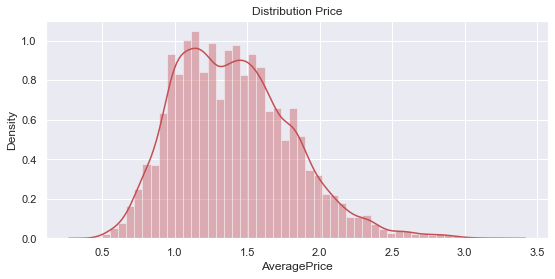

In [12]:
plt.figure(figsize=(9,4))
plt.title("Distribution Price")
ax = sns.distplot(df["AveragePrice"], color = 'r')

<AxesSubplot:xlabel='AveragePrice', ylabel='type'>

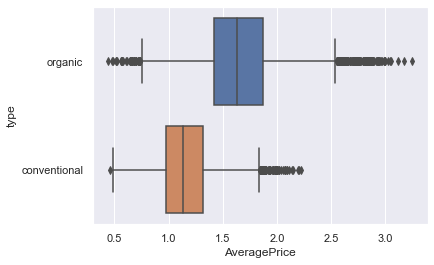

In [13]:
sns.boxplot(y="type", x="AveragePrice", data=df)

<AxesSubplot:xlabel='Date'>

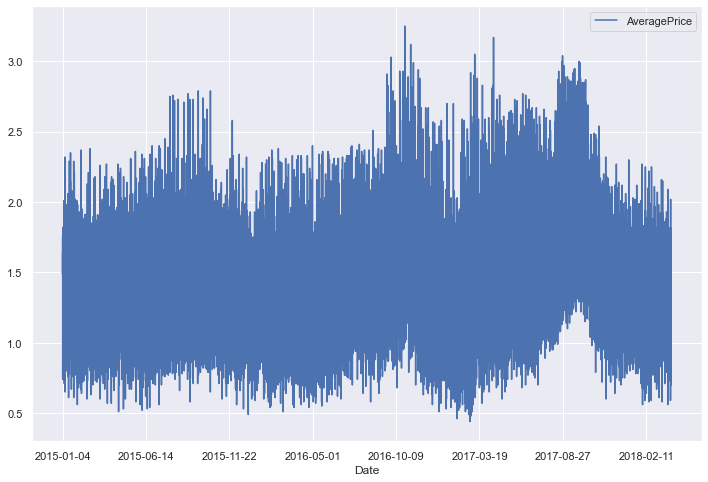

In [14]:
df.plot(x='Date', y='AveragePrice', figsize=(12,8))

In [15]:
# check if the data is balanced for region
df['region'].value_counts()

Southeast              338
NewOrleansMobile       338
SanDiego               338
BaltimoreWashington    338
Roanoke                338
RichmondNorfolk        338
Northeast              338
SouthCentral           338
GreatLakes             338
Louisville             338
Seattle                338
CincinnatiDayton       338
NewYork                338
Indianapolis           338
Chicago                338
Jacksonville           338
Columbus               338
Detroit                338
Philadelphia           338
PhoenixTucson          338
Nashville              338
Portland               338
HartfordSpringfield    338
Tampa                  338
Orlando                338
West                   338
Denver                 338
GrandRapids            338
NorthernNewEngland     338
BuffaloRochester       338
HarrisburgScranton     338
Pittsburgh             338
Boise                  338
LosAngeles             338
LasVegas               338
Atlanta                338
DallasFtWorth          338
M

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Southeast'),
  Text(1, 0, 'Chicago'),
  Text(2, 0, 'HarrisburgScranton'),
  Text(3, 0, 'Pittsburgh'),
  Text(4, 0, 'Boise'),
  Text(5, 0, 'WestTexNewMexico'),
  Text(6, 0, 'LosAngeles'),
  Text(7, 0, 'LasVegas'),
  Text(8, 0, 'Atlanta'),
  Text(9, 0, 'DallasFtWorth'),
  Text(10, 0, 'MiamiFtLauderdale'),
  Text(11, 0, 'Plains'),
  Text(12, 0, 'StLouis'),
  Text(13, 0, 'Syracuse'),
  Text(14, 0, 'Midsouth'),
  Text(15, 0, 'Sacramento'),
  Text(16, 0, 'Boston'),
  Text(17, 0, 'Charlotte'),
  Text(18, 0, 'Spokane'),
  Text(19, 0, 'Albany'),
  Text(20, 0, 'Houston'),
  Text(21, 0, 'SouthCarolina'),
  Text(22, 0, 'SanFrancisco'),
  Text(23, 0, 'TotalUS'),
  Text(24, 0, 'RaleighGreensboro'),
  Text(25, 0, 'BuffaloRochester'),
  Text(

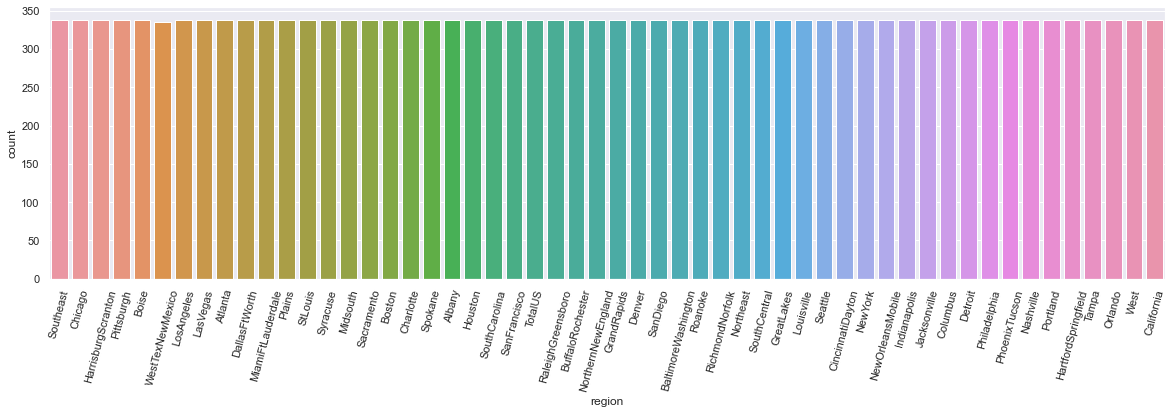

In [16]:
# countplot for regions
plt.figure(figsize=(20,5))
sns.countplot(x='region', data=df)
plt.xticks(rotation = 75)

In [17]:
df['year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

<AxesSubplot:xlabel='year', ylabel='count'>

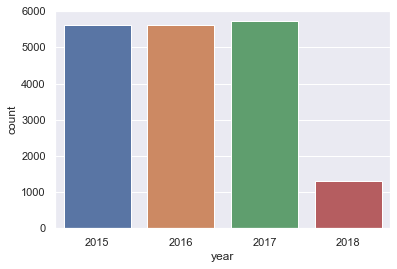

In [18]:
sns.countplot(x='year', data=df)

<AxesSubplot:xlabel='type', ylabel='count'>

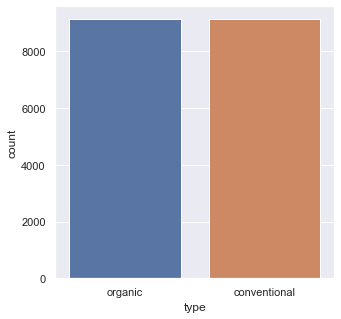

In [19]:
plt.figure(figsize=(5,5))
sns.countplot(df.type)

<AxesSubplot:xlabel='year', ylabel='Total Volume'>

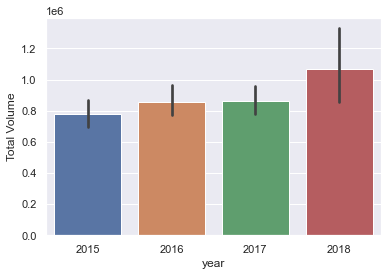

In [20]:
sns.barplot(x='year',y='Total Volume',data=df)

array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>],
       [<AxesSubplot:title={'center':'4225'}>,
        <AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>],
       [<AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>,
        <AxesSubplot:title={'center':'XLarge Bags'}>],
       [<AxesSubplot:title={'center':'year'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

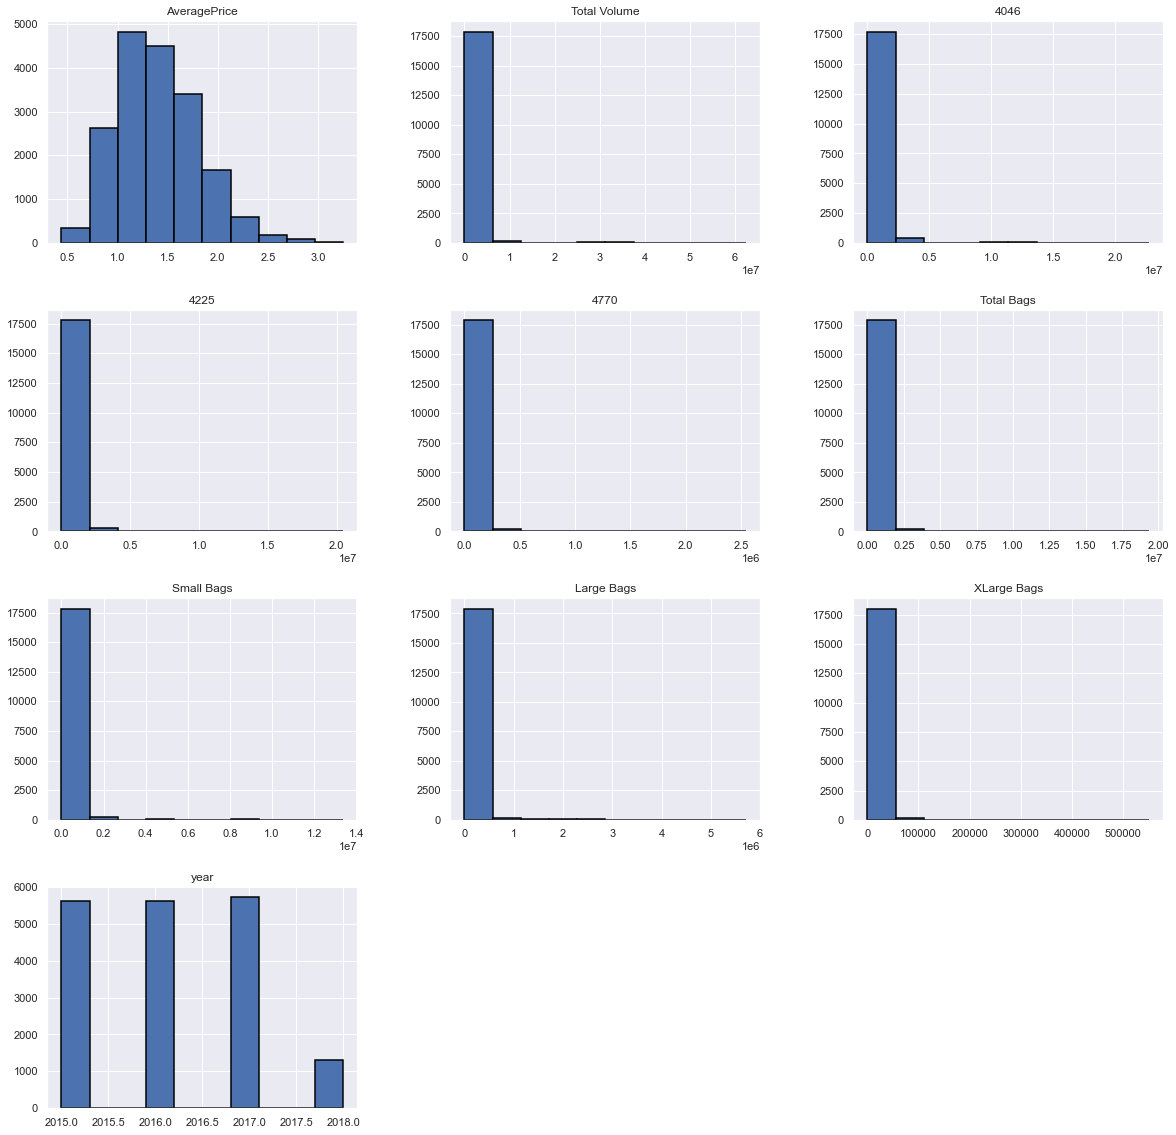

In [21]:
df.hist(edgecolor='black',linewidth=1.5,figsize=(20,20))

<AxesSubplot:>

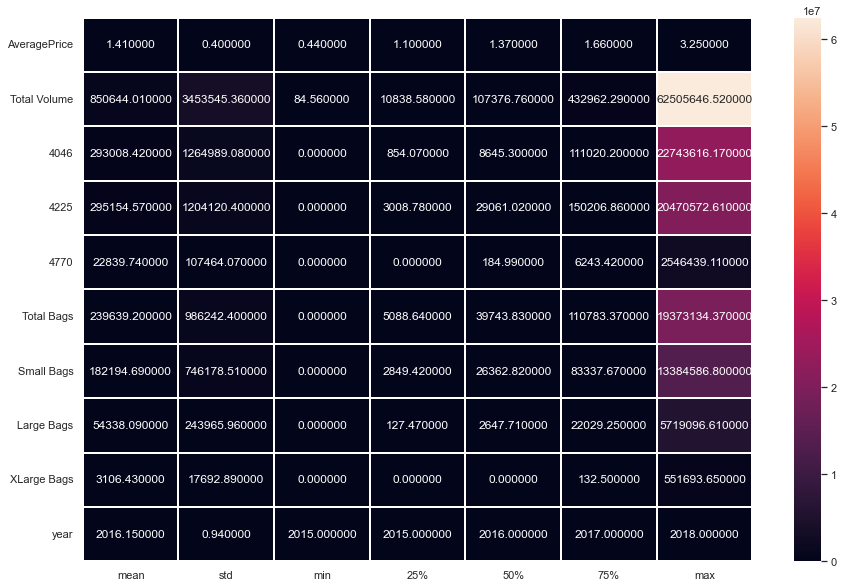

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")

AveragePrice:No deviation between mean and median,max and 75% has difference and also the data has disparity with mean and STD, which shows data is not normally distributed Total Volume: we can find outliers as mean and median,mean and standard deviation and 75% with max values have more variations than normal 4046:we can find outliers as mean and median,mean and standard deviation and 75% with max values have more variations than normal 4225:we can find outliers as mean and median,mean and standard deviation and 75% with max values have more variations than normal 4770:we can find outliers as mean and median,mean and standard deviation and 75% with max values have more variations than normal Total Bags:we can find outliers as mean and median,mean and standard deviation and 75% with max values have more variations than normal Small Bags:we can find outliers as mean and median,mean and standard deviation and 75% with max values have more variations than normal Large Bags:we can find outliers as mean and median,mean and standard deviation and 75% with max values have more variations than normal XLarge Bags:we can find outliers as mean and median,mean and standard deviation and 75% with max values have more variations than normal year:No deviation between mean and median,max and 75% has negligable difference

<AxesSubplot:>

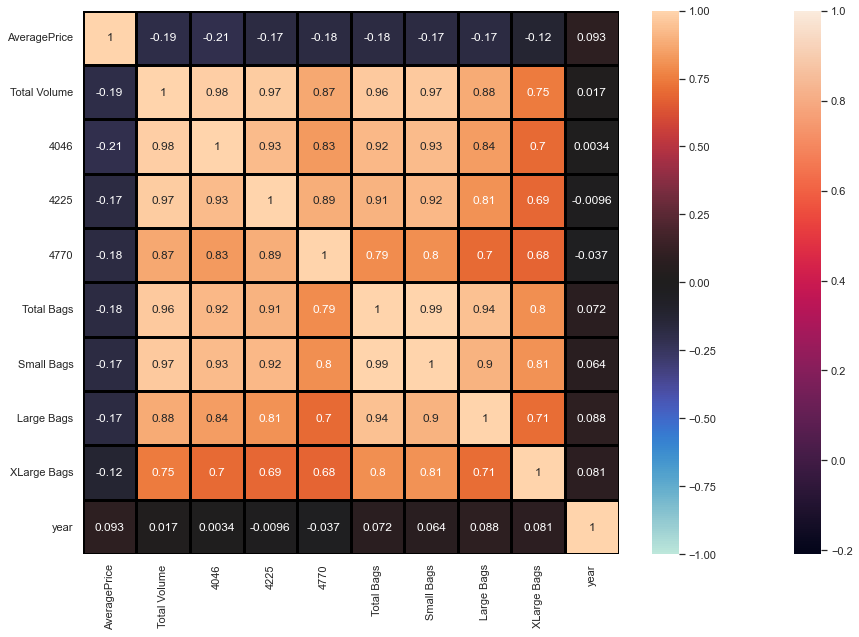

In [23]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr())
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, linewidths=3, linecolor='black')

In [24]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

In [25]:
skew=('Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags')

for col in skew:
    if df.skew().loc[col]>0.5:
        df[col]=np.log1p(df[col])

AveragePrice        AxesSubplot(0.125,0.71587;0.168478x0.16413)
Total Volume     AxesSubplot(0.327174,0.71587;0.168478x0.16413)
4046             AxesSubplot(0.529348,0.71587;0.168478x0.16413)
4225             AxesSubplot(0.731522,0.71587;0.168478x0.16413)
4770               AxesSubplot(0.125,0.518913;0.168478x0.16413)
Total Bags      AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Small Bags      AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Large Bags      AxesSubplot(0.731522,0.518913;0.168478x0.16413)
XLarge Bags        AxesSubplot(0.125,0.321957;0.168478x0.16413)
year            AxesSubplot(0.327174,0.321957;0.168478x0.16413)
dtype: object

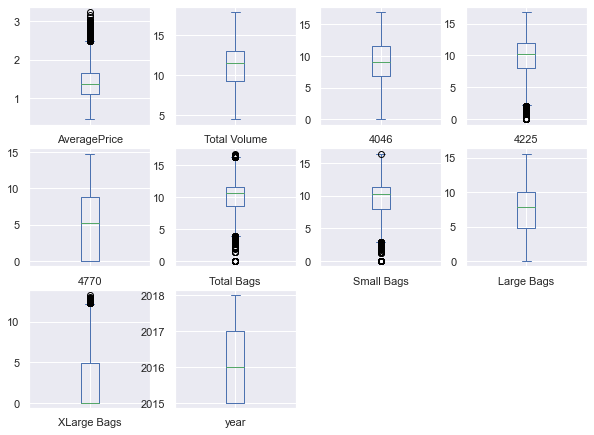

In [26]:
df.plot(kind='box',subplots= True,layout=(4,4),figsize=(10,10))

# Checking for outliers

Text(0, 0.5, 'Total Volume')

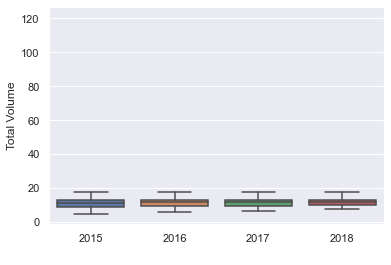

In [27]:
plt.plot(121)
a = sns.boxplot(x='year', y='Total Volume', data=df)
a.set_xlabel(" ", fontsize=12)
a.set_ylabel("Total Volume", fontsize=12)

Text(0.5, 1.0, 'type vs. Total Volume')

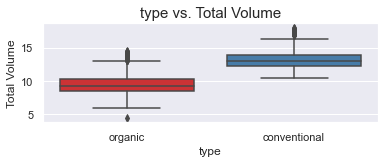

In [28]:
plt.subplot(211)
a = sns.boxplot(x='type', y='Total Volume', data=df, palette="Set1")
a.set_title("type vs. Total Volume", fontsize=15)


In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['type']=le.fit_transform(df['type'])
df['type']
df['region']=le.fit_transform(df['region'])
df['region']
le.fit(df.type.drop_duplicates())

LabelEncoder()

In [30]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int64
year              int64
region            int64
dtype: object

<AxesSubplot:title={'center':'Average price each month'}, xlabel='months', ylabel='AveragePrice'>

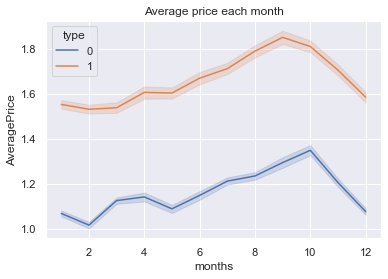

In [31]:
import datetime
df['Date']=pd.to_datetime(df['Date'])
df["months"]=df['Date'].map(lambda x : x.month)
plt.title('Average price each month')
sns.lineplot(x='months',y='AveragePrice',data=df,hue='type')

the above data shows the prices are not even in all the months, which means prices fluctuate according to seasonal changes

In [32]:
date=pd.to_datetime(df['Date'],errors='coerce')
df['Date']=date.dt.strftime("%Y%m%d").astype(int)

In [33]:
df.dtypes

Date              int64
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int64
year              int64
region            int64
months            int64
dtype: object

# REMOVING OUTLIERS

In [34]:
from scipy.stats import zscore
z=np.abs(zscore(df))
a=np.array(z)

In [35]:
a

array([[1.2852687 , 0.85436068, 0.47933784, ..., 1.22128204, 1.25161424,
        1.46495942],
       [1.2852687 , 0.20866348, 0.66875687, ..., 1.22128204, 1.18688412,
        1.46495942],
       [1.2852687 , 0.68051913, 1.45843264, ..., 1.22128204, 0.67351605,
        1.46495942],
       ...,
       [1.94931748, 0.03482193, 0.30007349, ..., 1.97050371, 1.18744323,
        0.89903378],
       [1.94931748, 0.73018814, 0.36617066, ..., 1.97050371, 1.31522614,
        0.89903378],
       [1.94931748, 0.16385413, 1.33987501, ..., 1.97050371, 0.09653607,
        0.89903378]])

In [36]:
threshold = 3
print(np.where(z<3))
print(df.shape)

(array([    0,     0,     0, ..., 18248, 18248, 18248]), array([ 0,  1,  2, ..., 11, 12, 13]))
(18249, 14)


In [37]:
df1=df[(z<3).all(axis=1)]

In [38]:
df.shape

(18249, 14)

In [39]:
df1.shape

(17834, 14)

In [40]:
df=df1

In [41]:
df.shape

(17834, 14)

In [42]:
percentage_loss=((18249-17840 )/18249)*100
percentage_loss

2.2412186969148995

 through zscore we loose 2.24% of data that is not a big lose

In [43]:
X = df.drop(['type','region'], axis = 1)
y = df.type

In [44]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
X

array([[-1.29348115,  0.92659103, -0.50705249, ..., -0.65510992,
        -1.22957126, -1.45632855],
       [-1.29348115,  0.25380146, -0.6977437 , ..., -0.65510992,
        -1.22957126, -1.45632855],
       [-1.29348115,  0.74545538, -1.49272309, ..., -0.65510992,
        -1.22957126, -1.45632855],
       ...,
       [ 1.93999091,  0.07266581,  0.27759353, ..., -0.65510992,
         1.96090944, -0.89183902],
       [ 1.93999091,  0.79720842,  0.34413462, ..., -0.65510992,
         1.96090944, -0.89183902],
       [ 1.93999091, -0.13434636,  1.32437856, ...,  1.60922368,
         1.96090944, -0.89183902]])

In [45]:
y=le.fit_transform(y)

In [46]:
from sklearn.preprocessing import power_transform
X=power_transform(X,method='yeo-johnson')

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [48]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [50]:
pred = knn.predict(x_test)

In [51]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1810
           1       1.00      1.00      1.00      1757

    accuracy                           1.00      3567
   macro avg       1.00      1.00      1.00      3567
weighted avg       1.00      1.00      1.00      3567



In [52]:
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

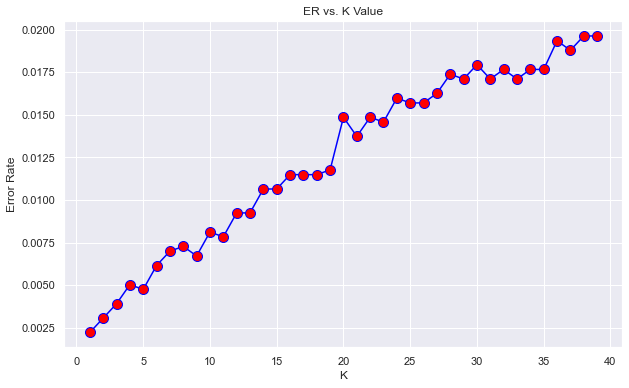

In [53]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('ER vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [54]:
lr=LogisticRegression()

lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.9643958508550603
[[1755   55]
 [  72 1685]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1810
           1       0.97      0.96      0.96      1757

    accuracy                           0.96      3567
   macro avg       0.96      0.96      0.96      3567
weighted avg       0.96      0.96      0.96      3567



In [55]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))


0.9321558732828708
[[1705  105]
 [ 137 1620]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1810
           1       0.94      0.92      0.93      1757

    accuracy                           0.93      3567
   macro avg       0.93      0.93      0.93      3567
weighted avg       0.93      0.93      0.93      3567



In [56]:
svc=SVC()
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.9882253994953742
[[1796   14]
 [  28 1729]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1810
           1       0.99      0.98      0.99      1757

    accuracy                           0.99      3567
   macro avg       0.99      0.99      0.99      3567
weighted avg       0.99      0.99      0.99      3567



In [57]:
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.9786935800392487
[[1785   25]
 [  51 1706]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1810
           1       0.99      0.97      0.98      1757

    accuracy                           0.98      3567
   macro avg       0.98      0.98      0.98      3567
weighted avg       0.98      0.98      0.98      3567



In [58]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.9882253994953742
[[1796   14]
 [  28 1729]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1810
           1       0.99      0.98      0.99      1757

    accuracy                           0.99      3567
   macro avg       0.99      0.99      0.99      3567
weighted avg       0.99      0.99      0.99      3567



In [59]:
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))


0.9786935800392487
[[1785   25]
 [  51 1706]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1810
           1       0.99      0.97      0.98      1757

    accuracy                           0.98      3567
   macro avg       0.98      0.98      0.98      3567
weighted avg       0.98      0.98      0.98      3567



In [60]:
dt=DecisionTreeClassifier()

dt.fit(x_train,y_train)
dt.score(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.9854219231847491
[[1794   16]
 [  36 1721]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1810
           1       0.99      0.98      0.99      1757

    accuracy                           0.99      3567
   macro avg       0.99      0.99      0.99      3567
weighted avg       0.99      0.99      0.99      3567



In [61]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
p=dt.predict(x_test)
print(accuracy_score(y_test,preddt))

0.9854219231847491


In [62]:
y_pred_prob=dt.predict_proba(x_test)[:,1]
y_pred_prob

array([1., 0., 0., ..., 1., 1., 0.])

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import r2_score
from sklearn import linear_model

In [64]:
max_r_score=0
for r_state in range (30,100):
    x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=r_state,test_size=0.20) 
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
        
print("max r2 score corresponding to:-",final_r_state,"is",max_r_score)

max r2 score corresponding to:- 85 is 0.7659802595133083


In [65]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=81,test_size=0.20) 


In [66]:
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),X,y,cv=10,scoring="r2").mean()

0.7340225257734629

In [67]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=81,test_size=0.20) 
lreg=linear_model.LinearRegression()
lreg.fit(x_train,y_train)
y_pred=lreg.predict(x_test)

In [68]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print ("r2 score is ",r2_score,(x_test,y_pred))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is  <function r2_score at 0x7fe7a03bc4c0> (array([[ 8.95000486e-01, -1.11082354e+00,  1.91461822e+00, ...,
         1.53665481e+00,  9.11615227e-01, -5.86058123e-01],
       [-1.33940672e+00, -4.38178387e-01,  9.12151615e-01, ...,
        -7.13832697e-01, -1.27486262e+00, -1.50781136e+00],
       [-1.34112237e+00,  1.59867537e+00, -1.60086404e+00, ...,
        -7.13832697e-01, -1.27486262e+00, -1.50781136e+00],
       ...,
       [ 8.92962145e-01,  1.51801093e+00, -1.00487098e+00, ...,
        -7.13832697e-01,  9.11615227e-01, -5.86058123e-01],
       [ 9.11874702e-01,  1.49771309e+00, -6.06956832e-01, ...,
        -7.13832697e-01,  9.11615227e-01, -1.78363824e-03],
       [ 9.11874702e-01,  1.10091834e+00, -4.75586727e-02, ...,
        -7.13832697e-01,  9.11615227e-01, -1.78363824e-03]]), array([-0.17318924,  0.25152342,  1.00725763, ...,  0.77809444,
        0.91830002,  0.75984619]))
RMSE is : 0.24761828678675118


# GridSearchCV

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [70]:
from sklearn.linear_model import Lasso

parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf= GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [71]:
print(clf.best_params_)
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

{'alpha': 0.0001, 'random_state': 0}


In [72]:
lss=r2_score(y_test,pred_ls)
for j in range (2,10):
    lsscore=cross_val_score(ls,X,y,cv=j)
    lsc=lsscore.mean()
    print("At cv:-",j)
    print("Cross validation score is :-",lsc*100)
    print("R2_score is:-",lss*100)
    print("\n")

At cv:- 2
Cross validation score is :- 58.8687174014635
R2_score is:- 75.45133691974618


At cv:- 3
Cross validation score is :- 69.17171005483645
R2_score is:- 75.45133691974618


At cv:- 4
Cross validation score is :- 71.67627703132307
R2_score is:- 75.45133691974618


At cv:- 5
Cross validation score is :- 72.55382965491057
R2_score is:- 75.45133691974618


At cv:- 6
Cross validation score is :- 72.7839678684008
R2_score is:- 75.45133691974618


At cv:- 7
Cross validation score is :- 73.13962251662686
R2_score is:- 75.45133691974618


At cv:- 8
Cross validation score is :- 73.2810238979642
R2_score is:- 75.45133691974618


At cv:- 9
Cross validation score is :- 73.610739979617
R2_score is:- 75.45133691974618




In [73]:
print ("at cv :-",5)
print("at cross validation score is :-",22.6594)
print("r2_score:-",52.9190)

at cv :- 5
at cross validation score is :- 22.6594
r2_score:- 52.919


In [74]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np
print('Error:-')
print('MeanAbsoluteError:',mean_absolute_error(y_test,pred_ls))
print('MeanSquaredError:',mean_squared_error(y_test,pred_ls))
print('RootMeanSquareError:',np.sqrt(mean_squared_error(y_test,pred_ls)))

Error:-
MeanAbsoluteError: 0.19888583948966423
MeanSquaredError: 0.061344525553582274
RootMeanSquareError: 0.24767827024909206


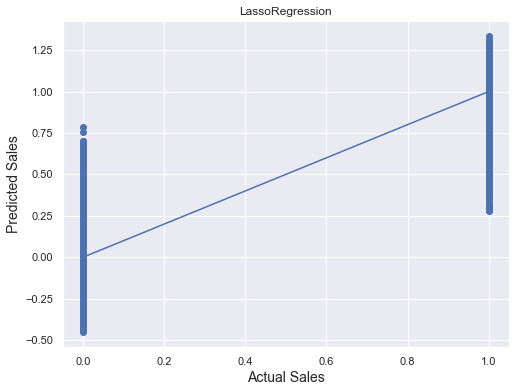

In [75]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_ls)
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Sales",fontsize=14)
plt.ylabel("Predicted Sales",fontsize=14)
plt.title("LassoRegression",fontsize=12)
plt.show()

# DecisionTreeRegressor

In [76]:
from sklearn.tree import DecisionTreeRegressor
parameters={'criterion':['mse','friedman_mse','mae'],'splitter':['best','random']}
dt=DecisionTreeRegressor()
clf=GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)


GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'splitter': ['best', 'random']})

In [77]:
print(clf.best_params_)
dt=DecisionTreeRegressor(criterion='friedman_mse',splitter='random')
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
pred_decision=dt.predict(x_test)


{'criterion': 'mse', 'splitter': 'random'}


In [78]:
dts=r2_score(y_test,pred_decision)
print('R2 Score:',dts*100)

R2 Score: 95.51245397812086


In [79]:
dtscore=cross_val_score(dt,X,y,cv=5)
dtc=dtscore.mean()
print('cross val score:',dtc*100)

cross val score: 82.76553474486367


Error:-
MeanAbsoluteError: 0.011213905242500702
MeanSquaredError: 0.011213905242500702
RootMeanSquareError: 0.10589572815983042


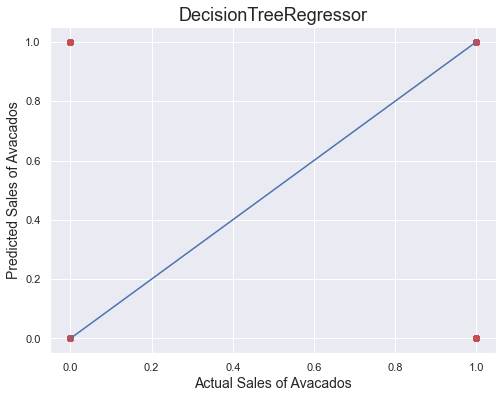

In [80]:
print('Error:-')
print('MeanAbsoluteError:',mean_absolute_error(y_test,pred_decision))
print('MeanSquaredError:',mean_squared_error(y_test,pred_decision))
print('RootMeanSquareError:',np.sqrt(mean_squared_error(y_test,pred_decision)))
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_decision,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Sales of Avacados",fontsize=14)
plt.ylabel("Predicted Sales of Avacados",fontsize=14)
plt.title("DecisionTreeRegressor",fontsize=18)
plt.show()

# AdaBoostRegressor

In [81]:
#AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
ADB=AdaBoostRegressor()
parameters={'base_estimator':[None], 'learning_rate':[1.0,2.0], 'loss':['linear','square','exponential'],'n_estimators':[50,100],'random_state':[50]}
ADB=AdaBoostRegressor()
clf=GridSearchCV(ADB,parameters)
clf.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'base_estimator': [None], 'learning_rate': [1.0, 2.0],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 100], 'random_state': [50]})

In [82]:
print(clf.best_params_)

{'base_estimator': None, 'learning_rate': 1.0, 'loss': 'linear', 'n_estimators': 50, 'random_state': 50}


In [83]:
ADB=AdaBoostRegressor(base_estimator=None,learning_rate=2.0,loss='square',n_estimators=100,random_state=50)
ADB.fit(x_train,y_train)
ADB.score(x_train,y_train)
pred_ADB=ADB.predict(x_test)

ADBS=r2_score(y_test,pred_ADB)
print('R2 Score:',ADBS*100)

ADBSscore=cross_val_score(ADB,X,y,cv=5)
ADBC=ADBSscore.mean()
print('cross val score:',ADBC*100)

R2 Score: 39.4905979974454
cross val score: 45.16466971051683


In [84]:
print('Error:-')
print('MeanAbsoluteError:',mean_absolute_error(y_test,pred_ADB))
print('MeanSquaredError:',mean_squared_error(y_test,pred_ADB))
print('RootMeanSquareError:',np.sqrt(mean_squared_error(y_test,pred_ADB)))

Error:-
MeanAbsoluteError: 0.3853520295502047
MeanSquaredError: 0.15120662763763484
RootMeanSquareError: 0.3888529640334954


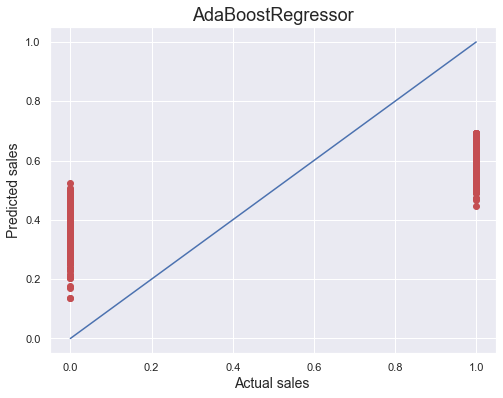

In [85]:
plt.figure(figsize=(8,6))

plt.scatter(x=y_test,y=pred_ADB,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual sales ",fontsize=14)
plt.ylabel("Predicted sales",fontsize=14)
plt.title("AdaBoostRegressor",fontsize=18)
plt.show()

# Stochastic Gradient Descent(SGDregressor)

In [86]:
from sklearn.linear_model import SGDRegressor
parameters={'alpha':[0.0001,0.001,0.01,0.1],'epsilon':[0.01,0.1],'penalty':['elasticnet'],'max_iter':[1000],'tol':[1e-3]}
SGD=SGDRegressor()
clf=GridSearchCV(SGD,parameters)
clf.fit(x_train,y_train)
                         
print(clf.best_params_)

{'alpha': 0.0001, 'epsilon': 0.1, 'max_iter': 1000, 'penalty': 'elasticnet', 'tol': 0.001}


In [87]:
SGD=SGDRegressor(alpha=0.0001,epsilon=0.01,max_iter=1000,penalty='elasticnet',tol=0.001)
SGD.fit(x_train,y_train)
pred_SGD=SGD.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(SGDRegressor(),x_train,y_train,cv=5).mean()

print(f"Accuracy={r2score*100},Cross_Val_score={cvscore*100}and difference={(r2score*100)-(cvscore*100)}")

Accuracy=75.46322601681568,Cross_Val_score=75.09307104907033and difference=0.37015496774534995


In [88]:
print('Error:-')
print('MeanAbsoluteError:',mean_absolute_error(y_test,pred_SGD))
print('MeanSquaredError:',mean_squared_error(y_test,pred_SGD))
print('RootMeanSquareError:',np.sqrt(mean_squared_error(y_test,pred_SGD)))

Error:-
MeanAbsoluteError: 0.1989382636471115
MeanSquaredError: 0.061857474397528714
RootMeanSquareError: 0.24871162899536628


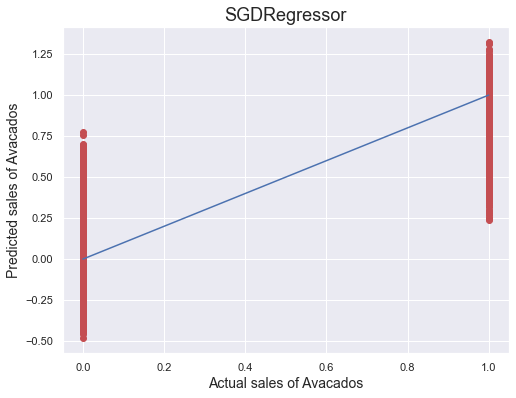

In [89]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_SGD,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual sales of Avacados",fontsize=14)
plt.ylabel("Predicted sales of Avacados",fontsize=14)
plt.title("SGDRegressor",fontsize=18)
plt.show()

In [91]:
parameters={"alpha":[0.0001,0.001,0.01,0.1,1,10],"epsilon":[0.01,0.1],'max_iter':[1000],'tol':[1e-3]}

from sklearn.model_selection import GridSearchCV

GCV=GridSearchCV(SGDRegressor(),parameters,cv=5,scoring='r2')

GCV.fit(x_train,y_train)
GCV.best_estimator_
GCV_pred=GCV.best_estimator_.predict(x_test)


print("Final accuracy:",r2_score(y_test,GCV_pred)*100)
clf.fit

Final accuracy: 75.25972672029766


<bound method BaseSearchCV.fit of GridSearchCV(estimator=SGDRegressor(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'epsilon': [0.01, 0.1], 'max_iter': [1000],
                         'penalty': ['elasticnet'], 'tol': [0.001]})>

# Save the model

In [96]:
import pickle
filename='avocado.pkl'
pickle.dump(SGD,open(filename,'wb'))

In [97]:
import numpy as np
b=np.array(y_test)
predicted=np.array(SGD.predict(x_test))


In [98]:
final_df=pd.DataFrame({"original":b,"predicted":predicted},index=range(len(b)))


# Original and Predicted Values

In [99]:
final_df

,original,predicted
0,0,-0.213495
1,0,0.245542
2,1,0.981653
3,1,1.001525
4,1,1.092111
...,...,...
3562,0,-0.003814
3563,0,-0.121377
3564,1,0.774467
3565,1,0.896004


From the above table the model is predicted the values with 75% accuracy